In [1]:
import numpy as np
import pandas as pd
import os
import joblib
import json

In [2]:
class HousePriceModel:
    def __init__(self):
        model_path = "XGB_regression_pipeline.pkl"
        self.model = joblib.load(model_path)
    def predict(self,data:dict| list[dict]):
        df = pd.DataFrame(data if isinstance(data, list) else [data])
        predictions = self.model.predict(df)
        return predictions

In [3]:
def convert_to_json(path):
    df = pd.read_csv(path)
    json_str =df.to_json()
    return json
    

In [4]:
df = pd.read_csv("test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
model =  HousePriceModel()
prediction  = model.predict(df.to_dict(orient='records'))
print(prediction)

[130168.39 157174.3  179137.9  ... 164214.6  121588.78 224777.23]


In [16]:
testOutput = pd.read_csv('sample_submission.csv')
new = testOutput['SalePrice']


0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

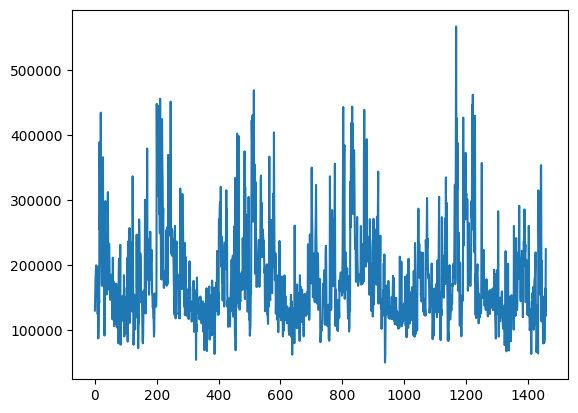

In [23]:
pl